## Chapter 4
# Whistler Data

In [2]:
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
# import python library
sys.path.append(os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'py'))

from sample import Sample
from dataset import Dataset
from database import Database
from sample_detector import SampleDetector

dataset_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','datasets', 'awdEvents1')
database_loc = os.path.join(os.getcwd().split(os.environ.get('USER'))[0],os.environ.get('USER'), 'wdml', 'data','databases', 'awdEvents1')
site = 'marion'
dataset = Dataset(dataset_loc, site)
database = Database(dataset_loc, database_loc, site)

Using TensorFlow backend.


## 4.2 Pre-Processing
### 4.2.1 Signal to Noise Ratio

Train: 2013-04-22UT01:28:03.48279656.marion.vr2
(array([[ 2.5, 54. ],
       [ 2.9, 76. ],
       [ 3. , 77. ]]), array([[390,  54],
       [453,  76],
       [469,  77]]))
(array([[ 12,  64, 358, 466],
       [ 12,  64, 421, 529],
       [ 12,  64, 437, 545]]), 3, 3)


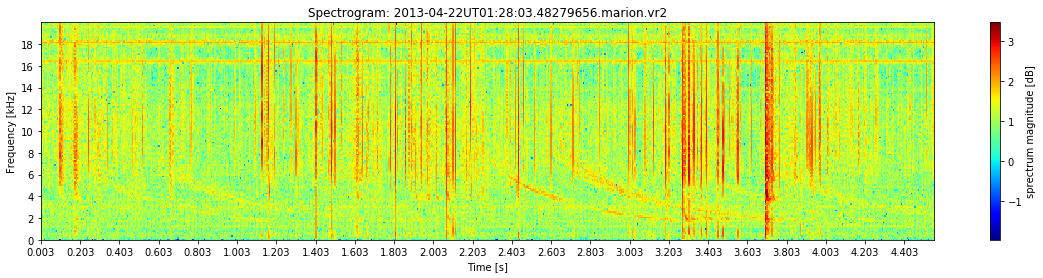

SNR = 3.059 dB


In [7]:
file = np.random.choice(database.get_train(),1)[0]
# file = '2013-07-19UT01:01:39.12931914.marion.vr2'
# file = '2013-10-08UT02:02:10.20979430.marion.vr2'
file = '2013-04-22UT01:28:03.48279656.marion.vr2'
# file = '2013-07-04UT19:27:45.49091930.marion.vr2'
print('Train:' if file in database.get_train() else 'Test:', file)
sample = SampleDetector(dataset_loc, site,file)

freq_range, time_err=[2,10],0.1
# print(sample.output())
print(sample.awda_whistlers(time_err=time_err))
print(sample.cuts(cut_freq=freq_range[1]-freq_range[0], cut_freq_min=freq_range[0], time_err=time_err, noise=False))
freq_size = 4
size = (freq_size*sample.get_time_freq_ratio(dec=2), freq_size)
sample.spectrogram_plot(figsize=size, xlabel='Time [s]', ylabel='Frequency [kHz]',zlabel='sprectrum magnitude [dB]', 
                           xaxis=True, yaxis=True, ticks=[0.2,2],
                           title="Spectrogram: "+sample.get_file(), cmap='jet', cmap_show=True)
print('SNR = %.3f dB'%sample.snr())

### 4.2.2 Preprocessing Visualisation

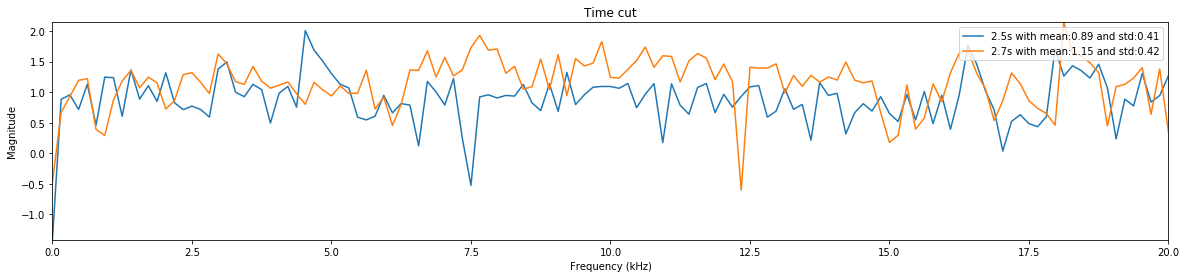

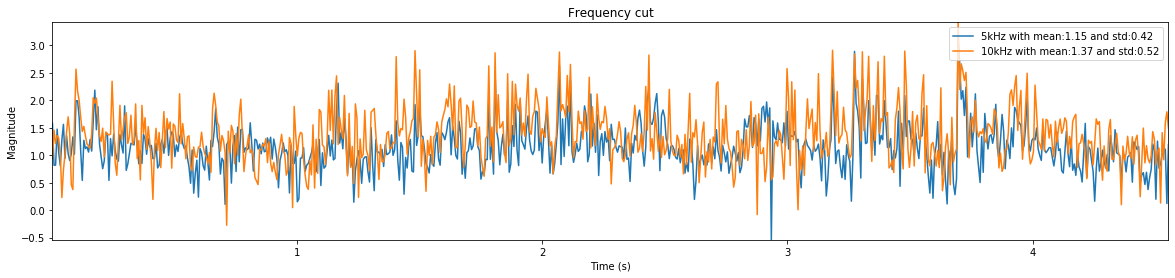

In [14]:
time = [2.5,2.7]
freq = [5,10]
_ = sample.spectrogram_time_cut_plot(time=time, figsize=size, title='Time cut', legend=[str(t)+'s' for t in time], stats=True, legend_loc='upper right')
_ = sample.spectrogram_freq_cut_plot(freq=freq, figsize=size, title='Frequency cut', legend=[str(f)+'kHz' for f in freq], stats=True, legend_loc='upper right')